Data Collection from Yahoo finance(Free open source) 

In [2]:
#Importing Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.fft import fft, ifft,fftfreq

In [34]:
# Defining the ticker symbol for Apple 
ticker_symbol = 'AAPL'

# Get data for the ticker symbol
df = yf.download(ticker_symbol,start = '2014-01-01').iloc[::-1]

#Change date index to datetime type
df.index = pd.to_datetime(df.index)

[*********************100%%**********************]  1 of 1 completed


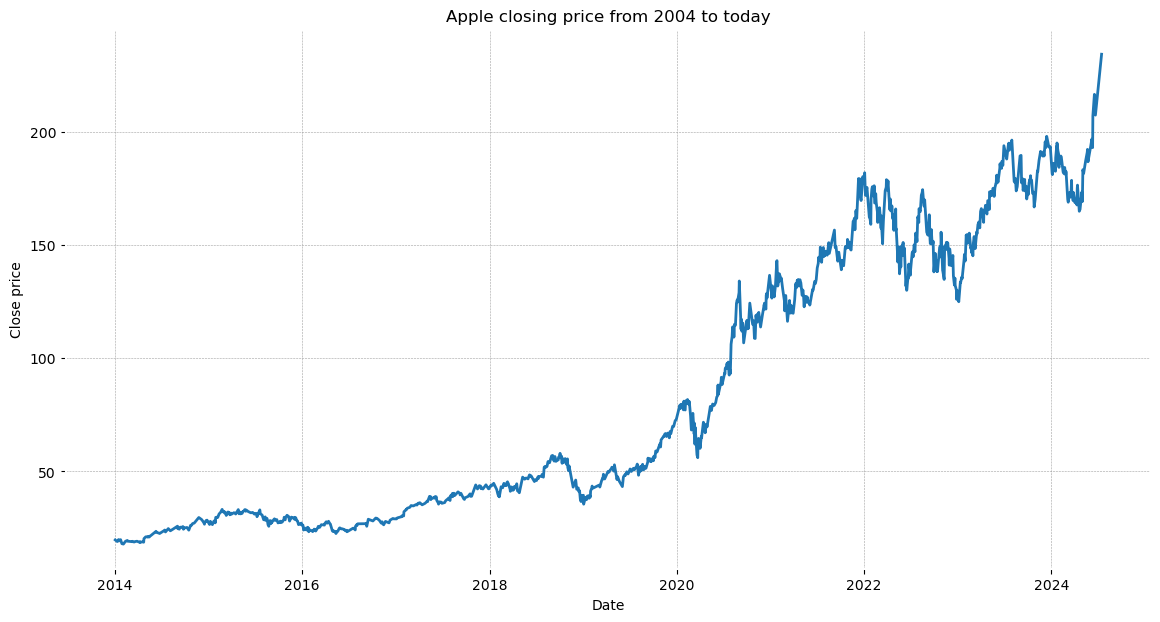

In [35]:
#Plotting lineplot from 2004 to todays date
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label = "APPL closing price")
plt.title('Apple closing price from 2004 to today')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.show()

In [36]:
#Visualisation of volume plot

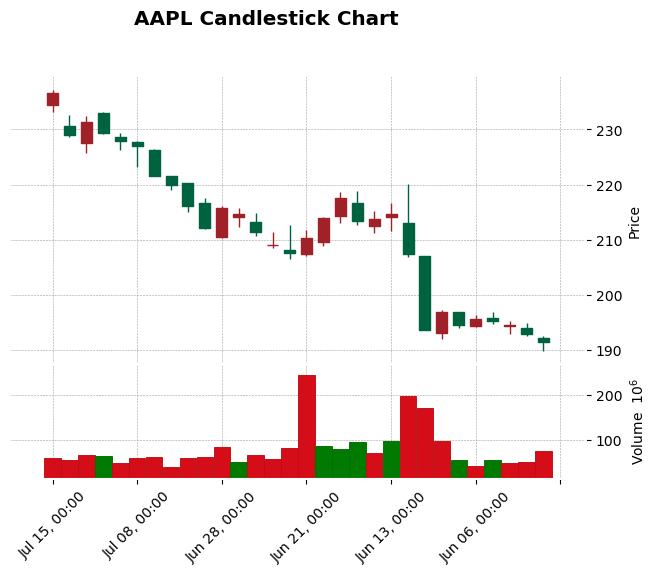

In [37]:
#candlestick chart for last 30 days to find out any recurring pattern 
import mplfinance as mpf
mpf.plot(df.iloc[0:30], type='candle', style='charles', title='AAPL Candlestick Chart', volume=True)


[]

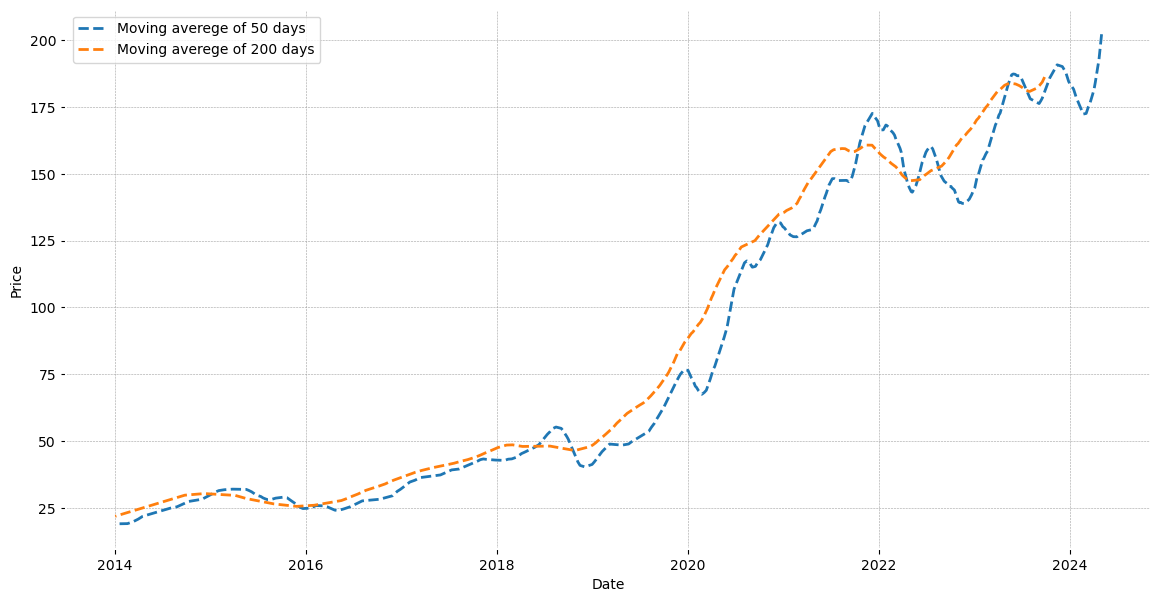

In [38]:
#Now let us visualize moving average for the data
close_mean_50 = df['Close'].rolling(window = 50).mean()
close_mean_200 = df['Close'].rolling(window = 200).mean()

#Plotting the data
plt.figure(figsize = (14,7))
plt.plot(close_mean_50 ,label = "Moving averege of 50 days",linestyle ='--')
plt.plot(close_mean_200 ,label = "Moving averege of 200 days",linestyle ='--')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.plot()

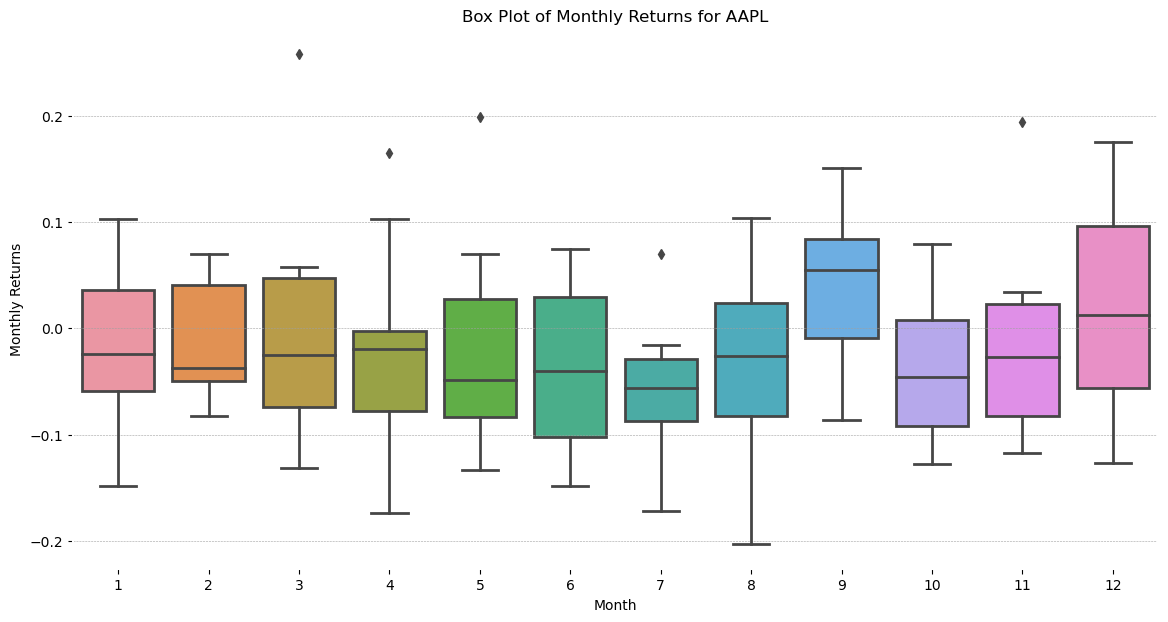

In [39]:
#  Box Plot of Monthly Returns
returns = df['Close'].pct_change().dropna()
returns_df = returns.to_frame()
returns_df['YearMonth'] = returns_df.index.to_period('M')
monthly_returns = returns_df.groupby('YearMonth')['Close'].sum()

plt.figure(figsize=(14, 7))
sns.boxplot(x=monthly_returns.index.month, y=monthly_returns)
plt.title('Box Plot of Monthly Returns for AAPL')
plt.xlabel('Month')
plt.ylabel('Monthly Returns')
plt.show()

# Starting fourier transformation



C:\Users\dixit\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


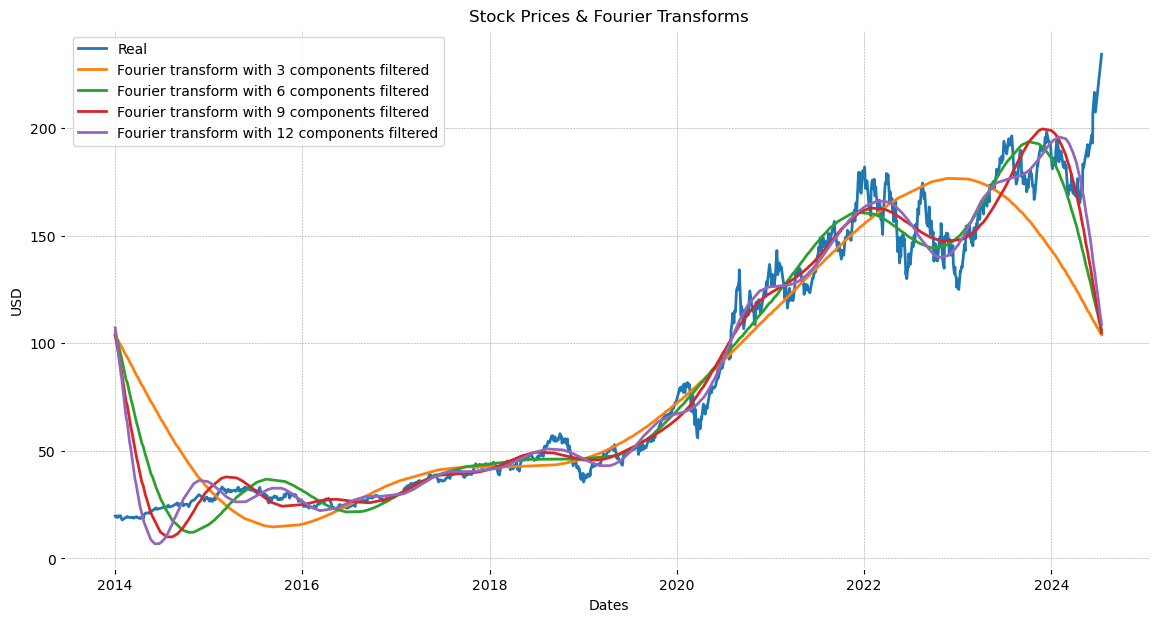

In [43]:
dataset_ex_df = df[['Close']]
# Fourier Transform
data_FT = dataset_ex_df[['Close']]
close_fft = np.fft.fft(data_FT['Close'].values)
fft_df = pd.DataFrame({
    'fft': close_fft,
    'absolute': np.abs(close_fft),
    'angle': np.angle(close_fft)
})

# Plot the Fourier Transforms
plt.figure(figsize=(14, 7), dpi=100)
plt.plot(data_FT.index, data_FT['Close'], label='Real')

# Plot reconstructions with filtered frequencies
for num in [3, 6, 9,12]:
    fft_list_filtered = np.copy(close_fft)
    fft_list_filtered[num:-num] = 0  # Zero out some frequencies
    filtered_data = np.fft.ifft(fft_list_filtered)
    plt.plot(data_FT.index, filtered_data, label=f'Fourier transform with {num} components filtered')

plt.xlabel('Dates')
plt.ylabel('USD')
plt.title('Stock Prices & Fourier Transforms')
plt.legend()
plt.show()